In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import signal
#removeds :'data_173103','data_173307'
files = ['data_173318','data_173329','data_173354','data_173403']

DATAFILE = np.load('DB_NG/'+files[0]+'.npy')

for i in range(1, len(files)):
    DATAFILE = np.vstack((DATAFILE,np.load('DB_NG/'+files[i]+'.npy')))

df = pd.DataFrame(DATAFILE, columns=['Sample','Label'])
df.head(6000)

,Sample,Label
0,588.0,0.0
1,612.0,0.0
2,587.0,0.0
3,588.0,0.0
4,529.0,0.0
5,617.0,0.0
6,614.0,0.0
7,618.0,0.0
8,594.0,0.0
9,598.0,0.0


In [2]:
df['Label'] =np.where(df['Label'] == 2.0, 1, 0)

In [3]:
print 'Pico máximo: %.1f'% max(df['Sample'])
print 'Rótulos:', np.unique(df['Label'])
print 'Quantidade de amostras:', len(df)

Pico máximo: 941.0
Rótulos: [0 1]
Quantidade de amostras: 24000


<IPython.core.display.Javascript object>


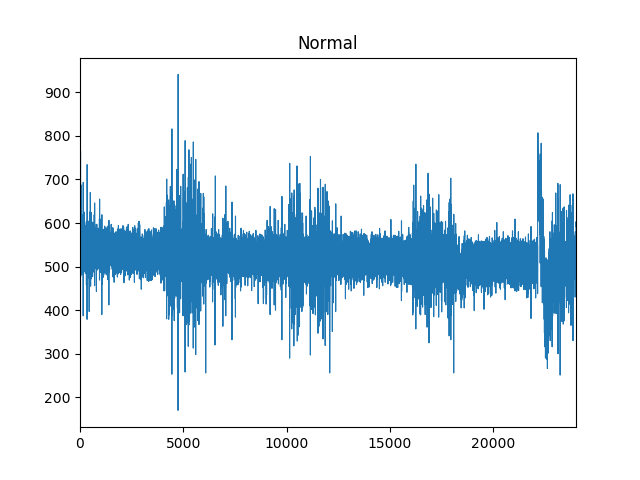

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

df['Sample'].plot(linewidth=0.8)
plt.title('Normal')

## Filter Test
---

In [5]:
df['Time']=pd.DataFrame(range(len(df['Sample'])))
df['Time'] = df['Time']/2000

<IPython.core.display.Javascript object>


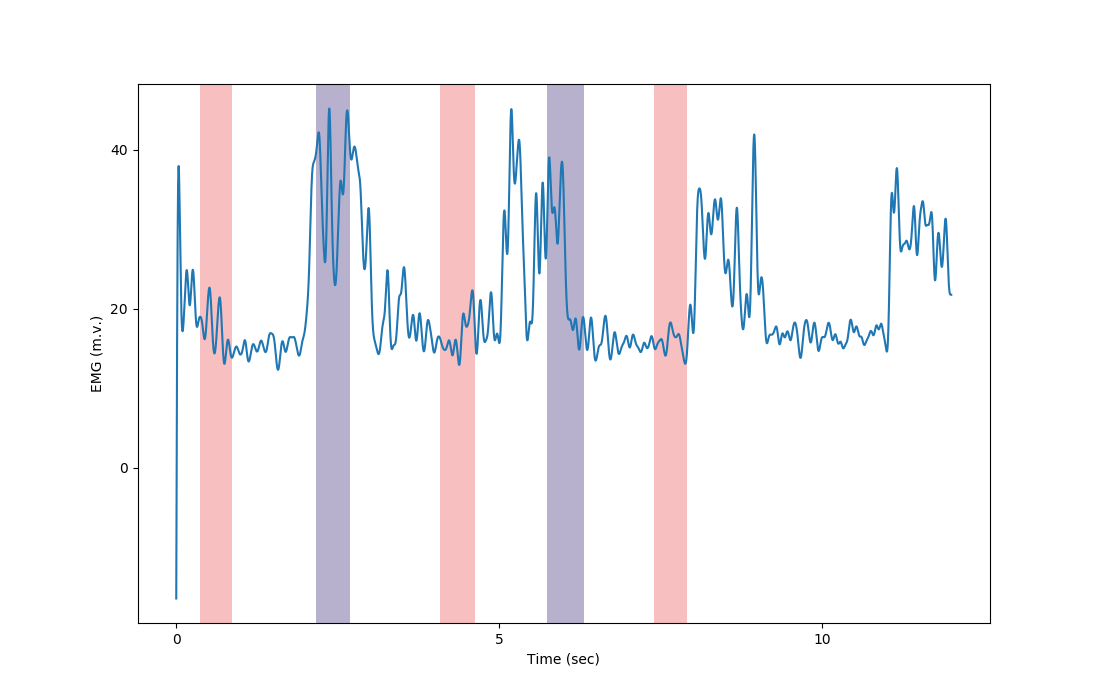

In [6]:
def filteremg(time, emg, low_pass=10., sfreq=2000., high_band=20., low_band=450.):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    return emg_envelope

def plot_fremg(df):   
    # plot graphs
    fig = plt.figure()
    

    #plt.subplot(4, 1, 1).xaxis.set_visible(False)
    #plt.subplot(4, 1, 1).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(40)) + ' Hz' + '\n VL-d')
    plt.plot(fr_emg['Time'], fr_emg['Sample'])
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.axvspan(0.36, 0.860, facecolor='#F08080', alpha=0.5)
    plt.axvspan(2.16, 2.69, facecolor='#70659e', alpha=0.5)
    plt.axvspan(4.09, 4.632, facecolor='#F08080', alpha=0.5)
    plt.axvspan(5.74, 6.32, facecolor='#70659e', alpha=0.5)
    plt.axvspan(7.39, 7.91, facecolor='#F08080', alpha=0.5)
    #plt.axvspan(7.996, 9.466, facecolor='#70659e', alpha=0.5)
    #plt.axvspan(9.465, 11.017, facecolor='#F08080', alpha=0.5)
    #plt.axvspan(11.016, 12.491, facecolor='#70659e', alpha=0.5)
    #plt.annotate('C1', xy=((2.087-0.599)/2+0.3, fr_emg['VL'].max()*.85))  
    #plt.annotate('C2', xy=((1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C3', xy=((2*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C4', xy=((3*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C5', xy=((4*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C6', xy=((5*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C7', xy=((6*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    #plt.annotate('C8', xy=((7*1.5+0.744)+0.3, fr_emg['VL'].max()*.85))
    plt.ylabel('EMG (m.v.)')
    plt.xlabel('Time (sec)')
    
    

    fig_name = 'fig_' + str(int(40)) + '.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

# show what different low pass filter cut-offs do
fr_emg = pd.DataFrame(df['Time'])


emg_correctmean = np.array(df['Sample'])
fr_emg['Sample'] = pd.DataFrame(filteremg(df['Time'], emg_correctmean, low_pass=20))

axx = fr_emg[fr_emg.Sample > 0]
plot_fremg(axx)

In [7]:
for i in range(len(fr_emg['Sample'])):
    if fr_emg['Sample'][i] < 0:
        print fr_emg['Sample'][i]

-16.4730081882
-15.0625529308
-13.6621692761
-12.2724656168
-10.8940410401
-9.5274847201
-8.17337532374
-6.83228043153
-5.50475597425
-4.19134568643
-2.8925805776
-1.60897842226
-0.341043269401


In [88]:
fr_emg[fr_emg.Sample > 0]

,Time,Sample
13,0.0065,0.910735
14,0.0070,2.145881
15,0.0075,3.363935
16,0.0080,4.564452
17,0.0085,5.747004
18,0.0090,6.911177
19,0.0095,8.056576
20,0.0100,9.182821
21,0.0105,10.289551
22,0.0110,11.376420


---

# Beginning the Classifier

In [10]:
X = df['Sample']

yz = df['Label']
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))

X.shape, y.shape

((24000,), (24000,))

In [11]:
np.unique(y)

array([ 0.,  1.])

In [12]:
X = X.values.reshape(-1, 1)

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

/home/collumbus/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
print X_train_std.shape

(18000, 1)


## Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

pred = gnb.predict(X_test)

from sklearn.metrics import accuracy_score
print ('ClassifyNB accuracy:---------->%.2f %%' % (accuracy_score(y_test, pred)*100))

ClassifyNB accuracy:---------->71.67 %


## Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc = rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print ('ClassifyNB accuracy:---------->%.2f %%' % (accuracy_score(y_test, pred)*100))

ClassifyNB accuracy:---------->71.53 %


## Suport Vector Machine - RBF

In [17]:
from sklearn import svm, datasets

print 'Processing time RBF'
%time rbf_svc = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)


Processing time RBF
CPU times: user 14.6 s, sys: 44 ms, total: 14.7 s
Wall time: 14.7 s


In [18]:
y_pred = rbf_svc.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

SVM-RBF accuracy:---------->71.42 %


## Suport Vector Machine - Poly

In [145]:
print 'Processing time Polynomial'
%time poly_svc = svm.SVC(kernel='poly', degree=2, coef0=4.7, C=48.9, decision_function_shape='ovr').fit(X_train_std, y_train)


Processing time Polynomial
CPU times: user 3min 10s, sys: 56 ms, total: 3min 10s
Wall time: 3min 10s


In [146]:
y_pred = poly_svc.predict(X_test_std)
print ('SVM-Polynomial accuracy:--->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

SVM-Polynomial accuracy:--->70.55 %


## Decision Tree

In [137]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(min_samples_split = 20)
dtc = dtc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time pred = dtc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyDT accuracy:---------->%.2f %%' % (accuracy_score(y_test, pred)*100))


Predict time
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 973 µs

ClassifyDT accuracy:---------->71.47 %


## Ada Boost

In [140]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, learning_rate = 2.5395)
abc = abc.fit(X_train_std, y_train)
print''

print 'Predict time'
%time pred = abc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score


print ('ClassifyAB accuracy:---------->%.2f %%' % (accuracy_score(y_test, pred)*100))


Predict time
CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 60.1 ms

ClassifyAB accuracy:---------->30.55 %


## Kneighbors

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=2, weights = 'distance', algorithm = 'auto', p = 1)
knc = knc.fit(X_train_std, y_train)
print''

print 'Predict time'
%time pred = knc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score



print ('ClassifyKN accuracy:---------->%.2f %%' % (accuracy_score(y_test, pred)*100))



Predict time
CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 24.5 ms

ClassifyKN accuracy:---------->66.05 %


# Classificadores Utilizados:

### knc : KNeighborsClassifier; 
### abc : AdaBoostClassifier; 
### dtc : tree.DecisionTreeClassifier; 
### rfc : RandomForestClassifier; 
### gnb : GaussianNB; 
### rbf_svc : SVMClassifierRBF; 
### poly_svc = SVMClassifierPoly


In [148]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('knc', knc), ('abc', abc), ('dtc', dtc), ('rfc', rfc), ('gnb', gnb), 
                                     ("rbf_svc", rbf_svc), ('poly_svc', poly_svc)], voting='hard',weights=[3,1,1,7,1,4,3])
eclf1 = eclf1.fit(X_train_std, y_train)

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

for clf, label in zip([knc, abc, dtc, rfc, gnb, rbf_svc, poly_svc, eclf1], ['KNieghbors', 'Ada Boost', 'Decision Tree', 
                                                                           'Random Forest', 'Naive Bayes', 'SVM-RBF', 
                                                                           'SVM-Poly', 'Ensemble']):
    scores = (cross_val_score(clf, X_train_std, y_train, cv=5, scoring='accuracy'))*100
    #print("Accuracy: %0.2f %%(+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    print("Accuracy: %0.2f %% [%s]" % (scores.mean(), label))

Accuracy: 66.38 % [KNieghbors]
Accuracy: 30.89 % [Ada Boost]
Accuracy: 70.62 % [Decision Tree]
Accuracy: 70.62 % [Random Forest]
Accuracy: 71.30 % [Naive Bayes]
Accuracy: 71.13 % [SVM-RBF]
Accuracy: 70.42 % [SVM-Poly]
Accuracy: 70.86 % [Ensemble]


## GridSearch to SVM-RBF

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = [
    {
        'C'     : [0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 6, 8,10, 20, 30, 40, 50, 70, 80, 100, 1000], 
        'gamma' : [1000, 100, 80, 50, 35, 10, 7, 5, 3, 2, 1.5, 1, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25, 0.2, 0.1, 0.01, 0.001], 
        'kernel': ['rbf'],
        'random_state' : [1,5,10,30,40,60,70,90,100,1000]
    },
]    
clf = GridSearchCV(svm.SVC(C=1), param_grid, cv=15)
%time clf.fit(X_train_std, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (mean_score, scores.std() * 2, params))
print()


In [3]:
import psutil
psutil.cpu_count()

4

In [4]:
p = psutil.Process()
p.cpu_affinity()

[0, 1, 2, 3]

In [5]:
all_cpus = list(range(psutil.cpu_count()))
p.cpu_affinity(all_cpus)